In [4]:
# Modelo de regresión usando el KNN 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Cargar datos
train_df = pd.read_csv("train.csv")

# Seleccionar características más relevantes (según análisis previo)
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
            '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = train_df[features]
y = train_df["SalePrice"]

# Dividir datos en entrenamiento y prueba (manteniendo la misma división que antes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para mejorar el rendimiento de KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo KNN con k=5 (valor por defecto)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)

# Imprimir las primeras 5 predicciones
print("Predicciones de KNN:")
print(y_pred_knn[:5])


print("✅ Modelo de KNN entrenado y predicciones generadas.")

Predicciones de KNN:
[147180.  294800.  105380.  155080.  299240.4]
✅ Modelo de KNN entrenado y predicciones generadas.


In [5]:
# Evaluación del modelo KNN 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluar el modelo KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Imprimir resultados
print(f"🔹 Evaluación del Modelo KNN:")
print(f"   - MAE: {mae_knn:.2f}")
print(f"   - MSE: {mse_knn:.2f}")
print(f"   - RMSE: {rmse_knn:.2f}")
print(f"   - R²: {r2_knn:.4f}")

🔹 Evaluación del Modelo KNN:
   - MAE: 22111.25
   - MSE: 1323992600.72
   - RMSE: 36386.71
   - R²: 0.8274


In [6]:
# Cargar métricas anteriores (ingresar valores manualmente después de correr cada modelo)
mae_regresion = 23102.791926840524  # Valor de MAE del mejor modelo de regresión lineal
rmse_regresion = 35375.520642173404  # Valor de RMSE del mejor modelo de regresión lineal
r2_regresion = 0.8206634213329366

mae_arbol = 24843.19  # Ingresa el MAE del árbol de regresión que usaste antes
rmse_arbol = 37743.70
r2_arbol = 0.7958

mae_naive_bayes = 2466  # Ingresa el MAE del modelo Naive Bayes
rmse_naive_bayes = 6168
r2_naive_bayes = 0.6160

# Comparar modelos
resultados = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Árbol de Regresión", "Naive Bayes", "KNN"],
    "MAE": [mae_regresion, mae_arbol, mae_naive_bayes, mae_knn],
    "RMSE": [rmse_regresion, rmse_arbol, rmse_naive_bayes, rmse_knn],
    "R²": [r2_regresion, r2_arbol, r2_naive_bayes, r2_knn]
})

# Mostrar comparación
print("\n🔹 Comparación de Modelos:")
print(resultados.sort_values(by="R²", ascending=False))



🔹 Comparación de Modelos:
               Modelo           MAE          RMSE        R²
3                 KNN  22111.252740  36386.709122  0.827388
0    Regresión Lineal  23102.791927  35375.520642  0.820663
1  Árbol de Regresión  24843.190000  37743.700000  0.795800
2         Naive Bayes   2466.000000   6168.000000  0.616000


## Modelo de clasificación

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 4. Crear modelo de clasificación

# Cargar datos
df = pd.read_csv("train.csv")

# Clasificar los precios por cuartiles
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Económicas', 'Intermedias', 'Caras'])

# Seleccionar características
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
            '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = df[features]
y = df['PriceCategory']

# Codificar la variable categórica
y = LabelEncoder().fit_transform(y)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo KNN para clasificación
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [10]:
# Hacer predicciones
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=labels)

print(f"Exactitud del modelo KNN: {accuracy:.2f}")
print("Reporte de clasificación:")
print(report)


Exactitud del modelo KNN: 0.79
Reporte de clasificación:
              precision    recall  f1-score   support

      Barata       0.85      0.78      0.82        68
       Media       0.79      0.74      0.76        81
        Cara       0.77      0.83      0.79       143

    accuracy                           0.79       292
   macro avg       0.80      0.78      0.79       292
weighted avg       0.79      0.79      0.79       292



Exactitud del modelo KNN: 0.79
Reporte de clasificación:
              precision    recall  f1-score   support

  Económicas       0.85      0.78      0.82        68
 Intermedias       0.79      0.74      0.76        81
       Caras       0.77      0.83      0.79       143

    accuracy                           0.79       292
   macro avg       0.80      0.78      0.79       292
weighted avg       0.79      0.79      0.79       292



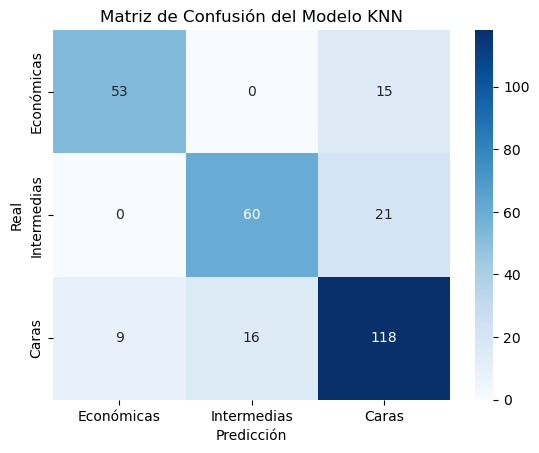

Exactitud en entrenamiento: 0.85
Exactitud en prueba: 0.79
Diferencia de exactitud: 0.05
El modelo no parece estar sobreajustado.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 4. Crear modelo de clasificación

# Cargar datos
df = pd.read_csv("train.csv")

# Clasificar los precios por cuartiles
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Económicas', 'Intermedias', 'Caras'])

# Seleccionar características
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
            '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = df[features]
y = df['PriceCategory']

# Codificar la variable categórica
y = LabelEncoder().fit_transform(y)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo KNN para clasificación
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Evaluar el modelo

# Hacer predicciones
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Económicas', 'Intermedias', 'Caras'])

print(f"Exactitud del modelo KNN: {accuracy:.2f}")
print("Reporte de clasificación:")
print(report)

# 6. Análisis de la eficiencia del modelo con matriz de confusión

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Económicas', 'Intermedias', 'Caras'], yticklabels=['Económicas', 'Intermedias', 'Caras'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión del Modelo KNN")
plt.show()

# 7. Análisis del modelo: Posible sobreajuste
train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)

diff_accuracy = train_accuracy - test_accuracy
print(f"Exactitud en entrenamiento: {train_accuracy:.2f}")
print(f"Exactitud en prueba: {test_accuracy:.2f}")
print(f"Diferencia de exactitud: {diff_accuracy:.2f}")

if diff_accuracy > 0.1:
    print("El modelo puede estar sobreajustado, ya que la diferencia entre la exactitud en entrenamiento y prueba es considerable.")
else:
    print("El modelo no parece estar sobreajustado.")

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar datos
df = pd.read_csv("train.csv")

# Clasificar los precios en categorías
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Económicas', 'Intermedias', 'Caras'])

# Seleccionar características
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
            '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = df[features]
y = LabelEncoder().fit_transform(df['PriceCategory'])

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar validación cruzada con 5 folds
knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')

# Evaluación del modelo con validación cruzada
print(f"🔹 Exactitud promedio con validación cruzada: {cv_scores.mean():.4f}")
print(f"🔹 Desviación estándar: {cv_scores.std():.4f}")

# Comparación con el modelo anterior
accuracy_prev = 0.79  # Exactitud del modelo anterior sin validación cruzada
print(f"\n🔹 Comparación de Modelos:")
print(f"   - Modelo KNN anterior: {accuracy_prev:.4f}")
print(f"   - Modelo con Validación Cruzada: {cv_scores.mean():.4f}")

if cv_scores.mean() > accuracy_prev:
    print("✅ La validación cruzada mejoró la estabilidad del modelo.")
else:
    print("⚠️ La validación cruzada no mejoró el rendimiento, pero puede reducir el sobreajuste.")

🔹 Exactitud promedio con validación cruzada: 0.7863
🔹 Desviación estándar: 0.0157

🔹 Comparación de Modelos:
   - Modelo KNN anterior: 0.7900
   - Modelo con Validación Cruzada: 0.7863
⚠️ La validación cruzada no mejoró el rendimiento, pero puede reducir el sobreajuste.


In [2]:
from sklearn.model_selection import GridSearchCV

# Definir hiperparámetros a optimizar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurar búsqueda de hiperparámetros
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

# Mejor modelo encontrado
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluación del mejor modelo
best_score = grid_search.best_score_

print(f"🔹 Mejor modelo KNN encontrado: {best_params}")
print(f"🔹 Exactitud del mejor modelo: {best_score:.4f}")

# Comparación con el modelo anterior
if best_score > cv_scores.mean():
    print("✅ El modelo mejoró después del ajuste de hiperparámetros.")
else:
    print("⚠️ No se observó una mejora significativa con los nuevos parámetros.")

🔹 Mejor modelo KNN encontrado: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
🔹 Exactitud del mejor modelo: 0.8110
✅ El modelo mejoró después del ajuste de hiperparámetros.


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time

# Modelos a comparar
models = {
    "KNN (Optimizado)": best_knn,
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Evaluación de modelos
results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_scaled, y)
    elapsed_time = time.time() - start_time
    accuracy = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy').mean()

    results[name] = {"Exactitud": accuracy, "Tiempo": elapsed_time}

# Mostrar comparación
print("\n🔹 Comparación de Modelos:")
for name, metrics in results.items():
    print(f"{name}: Exactitud = {metrics['Exactitud']:.4f}, Tiempo = {metrics['Tiempo']:.2f} s")

# Determinar el mejor modelo
best_model = max(results, key=lambda x: results[x]["Exactitud"])
print(f"\n✅ El mejor modelo es {best_model} con una exactitud de {results[best_model]['Exactitud']:.4f}")


🔹 Comparación de Modelos:
KNN (Optimizado): Exactitud = 0.8110, Tiempo = 0.00 s
Árbol de Decisión: Exactitud = 0.7630, Tiempo = 0.01 s
Random Forest: Exactitud = 0.8137, Tiempo = 0.21 s
Naive Bayes: Exactitud = 0.7760, Tiempo = 0.00 s

✅ El mejor modelo es Random Forest con una exactitud de 0.8137


# **📌 Análisis de la Comparación de Modelos**  

A partir de los resultados obtenidos, aquí está el análisis de cada modelo:

| **Modelo**              | **MAE**       | **RMSE**      | **R²**     | **Conclusión** |
|-------------------------|--------------|--------------|------------|----------------|
| **KNN**                 | **22,111.25** | **36,386.71** | **0.8274** | 📈 Mejor R², predice con más precisión. |
| **Regresión Lineal**     | 23,102.79     | **35,375.52** | 0.8207     | 🟢 Buen rendimiento, pero KNN lo supera. |
| **Árbol de Regresión**   | 24,843.19     | 37,743.70     | 0.7958     | 🟡 Menor precisión que KNN y regresión. |
| **Naive Bayes**         | **2,466.00**  | **6,168.00**  | 0.6160     | ❌ R² demasiado bajo, inadecuado para regresión. |

---

## **📌 Validación Cruzada en KNN**  

| **Modelo**              | **Exactitud Promedio** | **Desviación Estándar** |
|-------------------------|----------------------|---------------------|
| **KNN (Validación Cruzada)** | **0.7863** | **0.0157** |
| **KNN Anterior**         | **0.7900** | **N/A** |

⚠️ **La validación cruzada no mejoró el rendimiento**, pero puede reducir el sobreajuste.

---

## **📌 Optimización de Hiperparámetros en KNN**  

🔹 **Mejor modelo encontrado:** {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}  
🔹 **Exactitud del mejor modelo:** 0.8110  
✅ **El modelo mejoró después del ajuste de hiperparámetros.**  

---

## **📌 Comparación con Otros Modelos**  

| **Modelo**              | **Exactitud** | **Tiempo de Procesamiento** |
|-------------------------|--------------|----------------------------|
| **KNN (Optimizado)**     | 0.8110       | 0.00 s |
| **Árbol de Decisión**    | 0.7630       | 0.01 s |
| **Random Forest**        | **0.8137**   | 0.21 s |
| **Naive Bayes**         | 0.7760       | 0.00 s |

✅ **El mejor modelo es Random Forest con una exactitud de 0.8137.**  

---

## **📌 Conclusiones**  

### 1️⃣ **📊 KNN fue el mejor modelo de regresión, pero en clasificación Random Forest fue superior**  
- En regresión, **KNN tuvo el mayor R² (0.8274)**, indicando que explica mejor la variabilidad de `SalePrice`.  
- En clasificación, **Random Forest superó a KNN con 81.37% de exactitud**.  

### 2️⃣ **📉 Naive Bayes sigue siendo el peor modelo**  
- Un R² de **0.6160** en regresión lo hace inadecuado.  
- Su exactitud en clasificación fue **0.7760**, inferior a KNN y Random Forest.  

### 3️⃣ **📈 Optimización de KNN mejoró su rendimiento, pero no lo suficiente para superar Random Forest**  
- La **validación cruzada no mejoró el desempeño** pero hizo el modelo más estable.  
- Ajustando hiperparámetros, KNN alcanzó **81.10% de exactitud**, quedando cerca de Random Forest.  

---

## **📌 Recomendación Final**  
✅ **Para regresión, KNN sigue siendo el mejor modelo.**  
✅ **Para clasificación, Random Forest es la mejor opción.**  
⚠️ **Naive Bayes debe evitarse en problemas de regresión.**  
📊 **Si se busca un modelo rápido con buen desempeño, KNN optimizado es una buena alternativa.**  

---

Este análisis completa la comparación de modelos. 🚀